Measurement results: {'0010': 1.7209999999999999, '0100': 1.797, '1010': 1.7579999999999998, '1011': 4.6899999999999995, '0011': 4.951, '0111': 4.9399999999999995, '0000': 44.149, '1110': 1.698, '0001': 9.593, '1111': 4.838, '0101': 4.903, '1001': 4.825, '1100': 1.72, '1101': 4.8919999999999995, '1000': 1.781, '0110': 1.744}


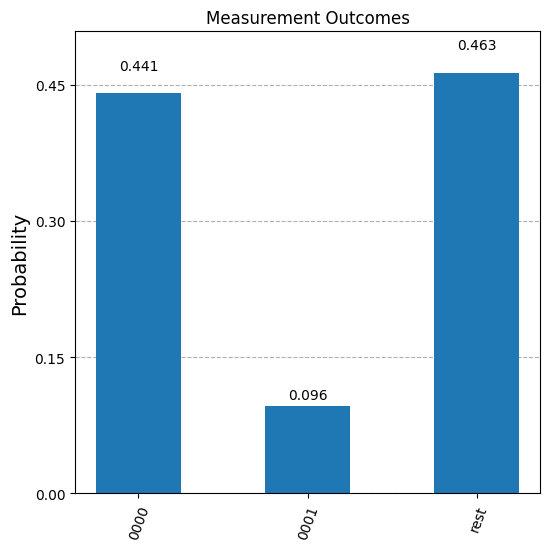

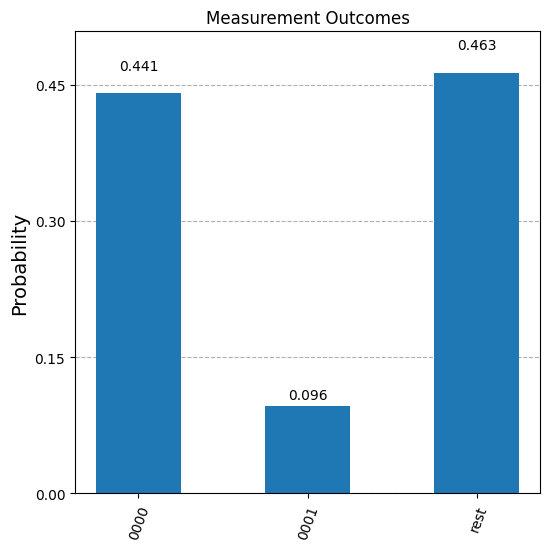

In [ ]:
# Install qiskit and qiskit-aer if you haven't already
!pip install qiskit qiskit-aer
!pip install pylatexenc
!pip install matplotlib

# Import necessary modules
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator  # Use AerSimulator instead of Aer
from qiskit.visualization import plot_histogram
from qiskit.visualization import visualize_transition
import matplotlib.pyplot as plt  # Import matplotlib
from IPython.display import display

n_qubits = 4
qc = QuantumCircuit(n_qubits)
# qc.h(range(n_qubits))  # Apply Hadamard gates to create superposition
# qc.h(8);
# qc.h(7);
# qc.h(6);
# qc.h(5);
# qc.h(4);
qc.h(3);
qc.h(2);
qc.h(1);

giter = 2; # number of Grover iterations

for _ in range(giter):
  marked_state = '0000'
  # Oracle: Mark the desired state by flipping its phase
  # Flip the bits of the marked state (e.g., '11' becomes '00')
  for i, bit in enumerate(reversed(marked_state)):
      if bit == '0':
          qc.x(i)  # Apply X gate to qubits where the marked state has '0'

  # Apply multi-controlled Z gate (MCZ) using mcx
  qc.h(n_qubits - 1)  # Apply H gate to the last qubit
  qc.mcx(list(range(n_qubits - 1)), n_qubits - 1)  # Multi-controlled X gate
  qc.h(n_qubits - 1)  # Apply H gate to the last qubit

  # Flip the bits back to the original state
  for i, bit in enumerate(reversed(marked_state)):
      if bit == '0':
          qc.x(i)  # Apply X gate to qubits where the marked state has '0'

  marked_state = '0001'
  # Oracle: Mark the desired state by flipping its phase
  # Flip the bits of the marked state (e.g., '11' becomes '00')
  for i, bit in enumerate(reversed(marked_state)):
      if bit == '0':
          qc.x(i)  # Apply X gate to qubits where the marked state has '0'

  # Apply multi-controlled Z gate (MCZ) using mcx
  qc.h(n_qubits - 1)  # Apply H gate to the last qubit
  qc.mcx(list(range(n_qubits - 1)), n_qubits - 1)  # Multi-controlled X gate
  qc.h(n_qubits - 1)  # Apply H gate to the last qubit

  # Flip the bits back to the original state
  for i, bit in enumerate(reversed(marked_state)):
      if bit == '0':
          qc.x(i)  # Apply X gate to qubits where the marked state has '0'

  # Diffusion operator: Amplitude amplification
  qc.h(range(n_qubits))  # Apply H gates to all qubits
  qc.x(range(n_qubits))  # Apply X gates to all qubits
  qc.h(n_qubits - 1)  # Apply H gate to the last qubit
  qc.mcx(list(range(n_qubits - 1)), n_qubits - 1)  # Multi-controlled X gate
  qc.h(n_qubits - 1)  # Apply H gate to the last qubit
  qc.x(range(n_qubits))  # Apply X gates to all qubits
  qc.h(range(n_qubits))  # Apply H gates to all qubits

qc.measure_all()  # Measure all qubits

# Simulate the circuit using AerSimulator
simulator = AerSimulator()  # Use AerSimulator
job = simulator.run(qc, shots=100000)  # Run the circuit with 1000 shots

# Grab results from the job
result = job.result()
counts = result.get_counts(qc)
total_counts = sum(counts.values())
percentages = {state: (count / total_counts) * 100 for state, count in counts.items()}

# Visualize the results
print("Measurement results:", percentages)
fig, ax=plt.subplots(figsize=(6, 6))
plot_histogram(percentages, title="Measurement Outcomes", ax=ax, number_to_keep=2)

ax.set_ylabel("Probability")
display(plt.gcf())